# Wine Data Analysis 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler # data normalisation with sklearn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Datasets

In [3]:
### Datasets ###
red_wine = pd.read_csv('/Users/tanchaud/CAB_Berlin/Project_2/Sprint_1/winequality-red.csv', sep=';')
white_wine =  pd.read_csv('/Users/tanchaud/CAB_Berlin/Project_2/Sprint_1/winequality-white.csv', sep= ';')

## Data Wrangling ##

In [4]:
##### Data Enriching ##### ... creating new columns that will help define the targets for each model. 

red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

In [5]:
# Data Structuring # 
# This step includes merging datasets, separating single columns into several
# or combining several columns into a single column. 

wines = pd.concat([red_wine, white_wine])

# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)




In [6]:
# Data Cleaning # 
# This step includes: 
# missing values 
# duplicates
# Standardize formats and input ranges. 
# Change data to correct type.
# Remove outliers 
# Correct misspellings 

wines = wines.drop_duplicates()

wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6490,5.9,0.26,0.24,2.4,0.046,27.0,132.0,0.99234,3.63,0.73,11.3,5,white
6491,8.0,0.34,0.49,9.0,0.033,39.0,180.0,0.99360,3.13,0.38,12.3,8,white
6493,5.6,0.28,0.27,3.9,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,7,white
6494,6.4,0.37,0.20,5.6,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,5,white


In [7]:
 # --- Encoding Categorical Variables ---#

encoder = LabelEncoder()
wines['wine_type'] = encoder.fit_transform(wines['wine_type'])
wines['wine_type']

wines.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                 int64
dtype: object

In [8]:
wines = wines.drop(['quality'],axis=1)
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,1
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,0
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,1
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,1
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6490,5.9,0.26,0.24,2.4,0.046,27.0,132.0,0.99234,3.63,0.73,11.3,1
6491,8.0,0.34,0.49,9.0,0.033,39.0,180.0,0.99360,3.13,0.38,12.3,1
6493,5.6,0.28,0.27,3.9,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,1
6494,6.4,0.37,0.20,5.6,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,1


## Exploratory Data Analysis ## 

In [9]:
wines.head()
wines.tail()

print(wines.shape)

(5320, 12)


Text(0.5, 1.0, 'Wines')

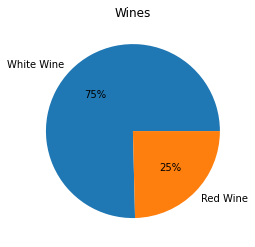

In [10]:
plt.pie(x=[white_wine.shape[0],red_wine.shape[0]], labels=['White Wine', 'Red Wine'], autopct = '%0.0f%%')
plt.savefig('wines_count.png', facecolor='w')
plt.title('Wines')

### Univariate Analysis ### 

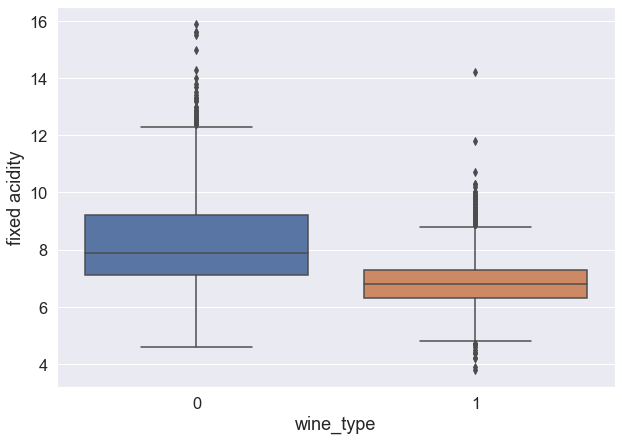

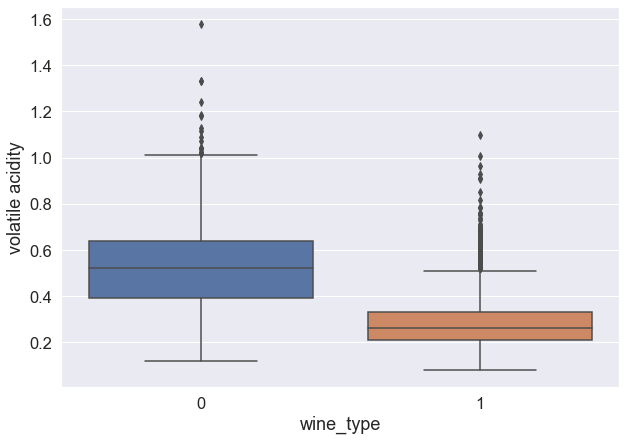

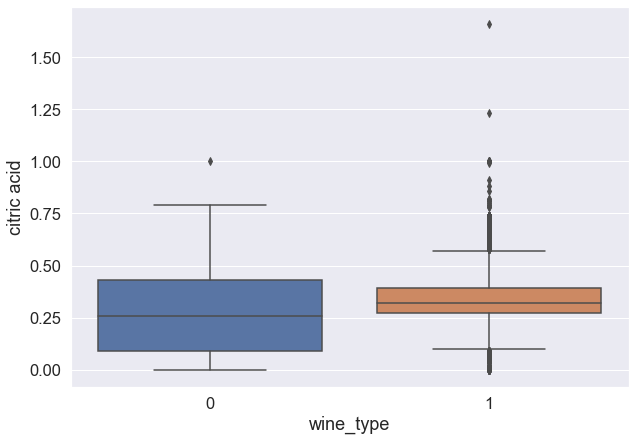

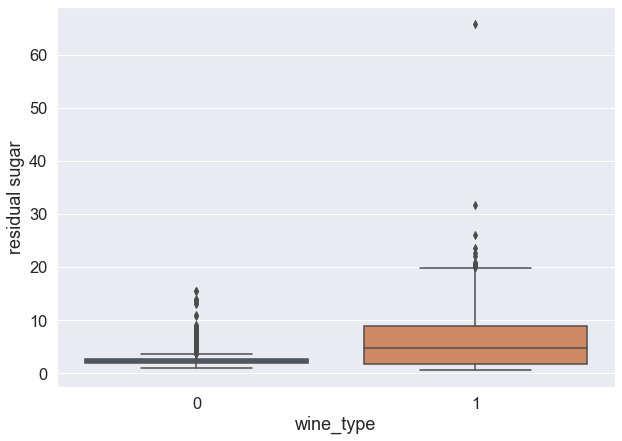

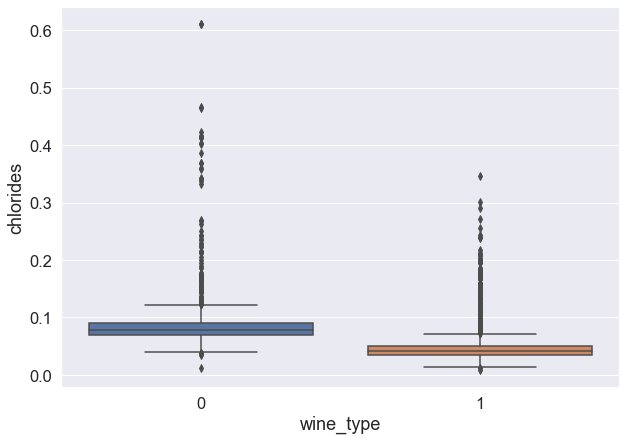

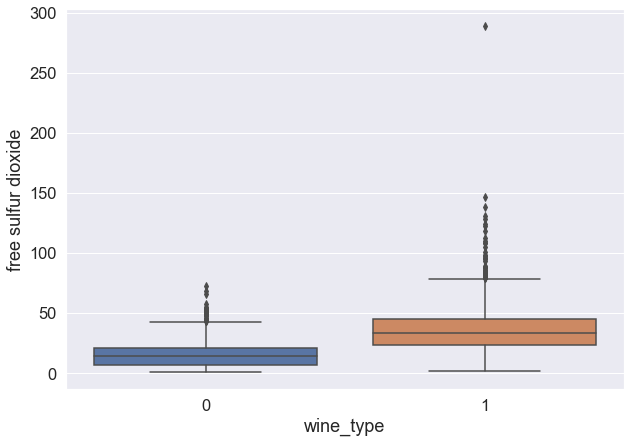

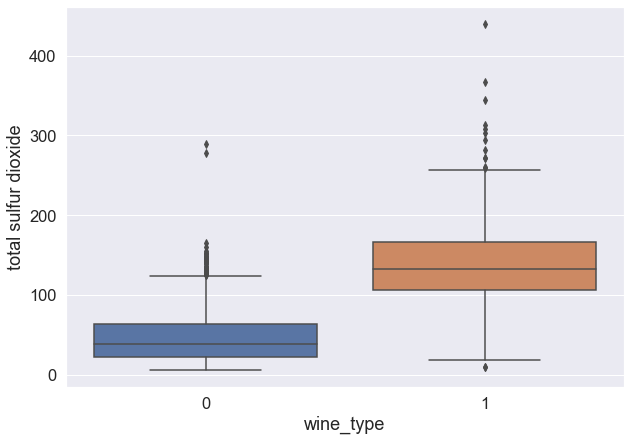

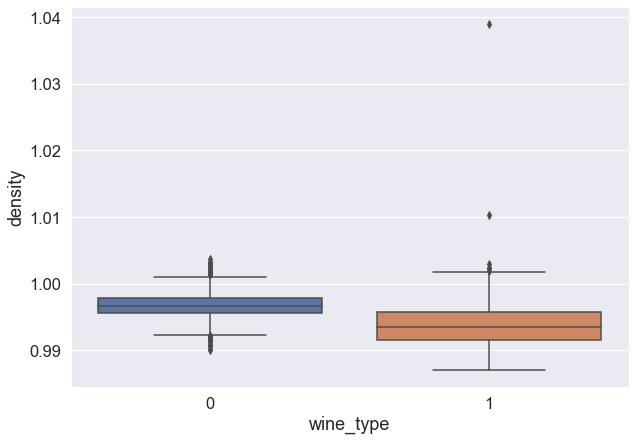

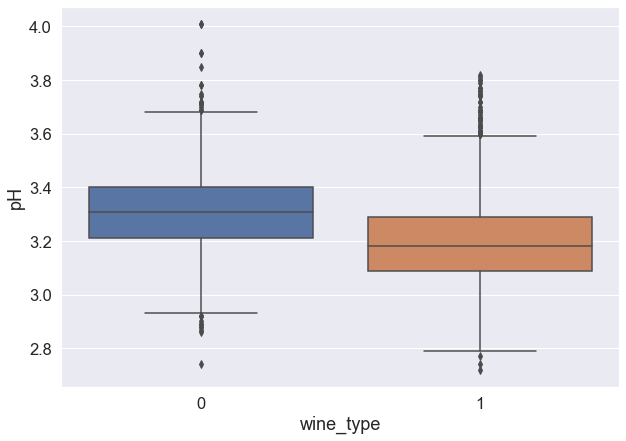

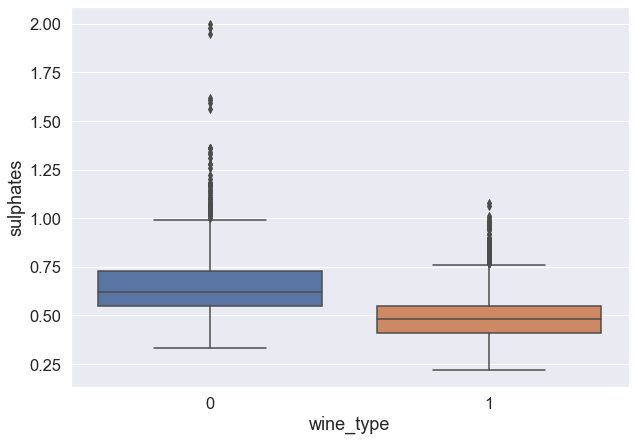

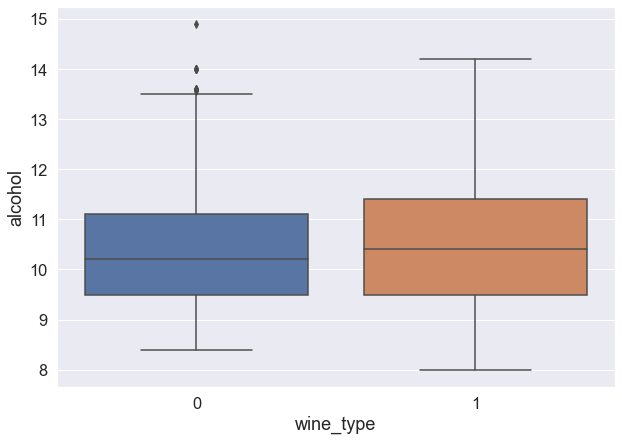

In [14]:
features = wines.select_dtypes(include=['float64'])

for feature in features: 

        fig = plt.figure()

        
        # Seaborn Aesthetics Settings 
        sns.set_theme()
        sns.set_context()
        
        fig.set_size_inches(10,7)
        sns.set(font_scale = 1.5)
        sns.boxplot(x=wines['wine_type'],y=wines[feature])
        
        plt.show()    


In [ ]:
features = wines.select_dtypes(include=['float64']).columns

for feature in features: 

        
        fig = plt.figure()
        fig.set_size_inches(10,7)

        wines[feature].plot.hist(bins=15, color='blue', edgecolor='black', linewidth=1.0)
        plt.xlabel(feature)
        #plt.title('Red Wine')
        plt.show() 
        #break

#### Observations from Univariate Analysis: 

#### Wine Type: 
#### Difference between red and white wine for each feature. Outliers are present. The data is positively skewed. 

#### Wine Quality: 
#### Only alcohol shows a clear difference across wine quality. 


#### Outlier Removal 

In [20]:
feature = 'fixed acidity'

q1 = wines[feature].quantile(0.25)
q3 = wines[feature].quantile(0.75)
iqr = q3 - q1 
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

wines = wines.loc[(wines[feature] >= lower_bound) & (wines[feature] <= upper_bound)]

#### We chose alcohol as a feature to remove the outliers, because alcohol has the highest correlation with quality, which is what we finally want to train a model to determine given the physiochemical wine properties as features. 

In [21]:
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,1
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,0
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,1
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,1
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6490,5.9,0.26,0.24,2.4,0.046,27.0,132.0,0.99234,3.63,0.73,11.3,1
6491,8.0,0.34,0.49,9.0,0.033,39.0,180.0,0.99360,3.13,0.38,12.3,1
6493,5.6,0.28,0.27,3.9,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,1
6494,6.4,0.37,0.20,5.6,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,1


In [22]:
wines.shape

(5004, 12)

### Multivariate Analysis ### 

In [ ]:
## 2. Exploring features of interest from univariate analysis 

sns.scatterplot(x=wines['quality'], y=wines['alcohol'], hue=wines['quality_label'])

correlation = wines['volatile acidity'].corr(wines['wine_type'])

correlation 

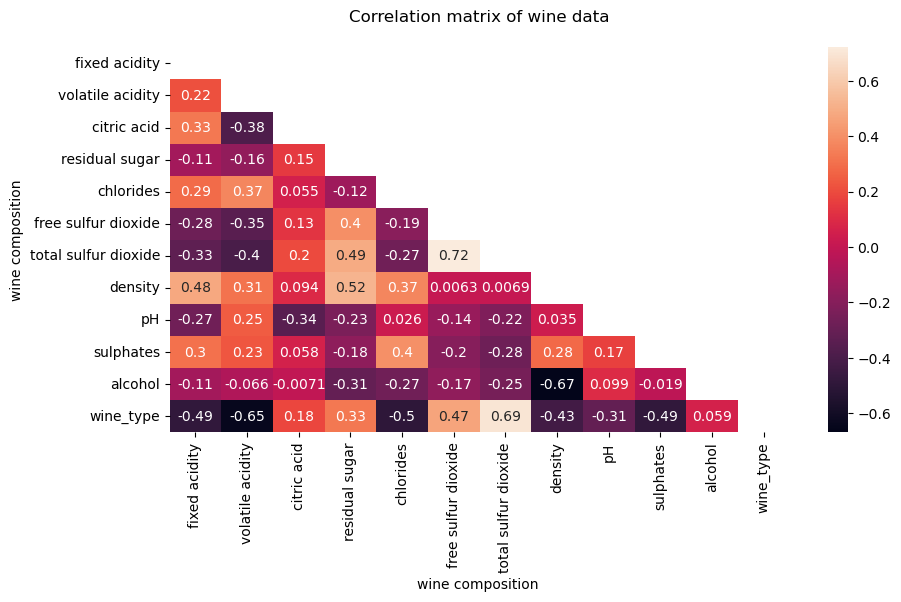

In [14]:
import matplotlib
matplotlib.style.use('default')

fig = plt.figure()
fig.set_size_inches(10,5)

wines_corrmat = wines.corr()
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(wines_corrmat)
hm = sns.heatmap(wines_corrmat, annot = True, mask=matrix)
hm.set(xlabel='wine composition ', ylabel='wine composition', title = "Correlation matrix of wine data\n")
plt.show()



In [ ]:
from scipy import stats
import scipy.stats

features = wines.select_dtypes(include=['float64']).columns

for feature in features: 

    # F and p values
    f_value, p_value = stats.f_oneway(wines[wines['quality_label'] == 'low'][feature],
    wines[wines['quality_label'] == 'medium'][feature],
    wines[wines['quality_label'] == 'high'][feature])
    #print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
    print(feature,' F Statistic:', f_value, '\tp-value:', p_value)

    # anova table as output
    import statsmodels.api as sm
    from statsmodels.formula.api import ols

    # Ordinary Least Squares (OLS) model
    X = wines.iloc[:,:12]
    y = wines['quality_label']
    X = sm.add_constant(X)
    model = ols(y,X).fit()
    anova_table = sm.stats.anova_lm(model, typ=1)
    anova_table

#print('Critical Value: ', scipy.stats.f.ppf(q=0.05,dfn=2,dfd=6494))

# ## Post-Hoc Test (Tukey's HSD) to see which labels differ #

# from bioinfokit.analys import stat

# res = stat()
# res.tukey_hsd()



# Red and White Wine Classification using Machine Learning #

In [1]:
# Features & Target
X = wines.select_dtypes(include=['float64'])
y = wines['wine_type'] # --> what you're trying to predict


NameError: name 'wines' is not defined

In [19]:
# --- Data Split --- #
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# --- Feature Scaling ---- # 
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)

X_train = X_train_norm
X_test = X_test_norm


In [20]:
# --- Classification Models  --- #

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score



In [21]:
models = [
           ('Log Reg',LogisticRegression()),
           ('RF',RandomForestClassifier()),
           ('KNN',KNeighborsClassifier()),
           ('SVM',SVC()), 
           ('NB',GaussianNB()),
           ('XGB',XGBClassifier())
        ]

for name, model in models: 

  model.fit(X_train, y_train)
  
  predictions = model.predict(X_test)

  # Evaluation metrics 

  # Confusion Matrix
  cm = confusion_matrix(y_test, predictions)

  TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

  print(name)

  #print('True Positive(TP)  = ', TP)
  #print('False Positive(FP) = ', FP)
  #print('True Negative(TN)  = ', TN)
  #print('False Negative(FN) = ', FN)

  # Acuuracy
  #accuracy =  (TP+TN) /(TP+FP+TN+FN)
  #print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

  # Balanced Accuracy
  Sensitivity = TP/(TP + FN); Specificity = TN/(TN + FP)
  balanced_accuracy  = (Sensitivity + Specificity)/2
  print('Balanced Accuracy: ', balanced_accuracy) 

  # Classification Report 
  print(classification_report(y_test, predictions))

  # Kappa score 
  kappa = cohen_kappa_score(predictions, y_test)
  print("Cohen-Kappa score:", kappa)

Log Reg
Accuracy of the binary classification = 0.986
Balanced Accuracy:  0.9752837640327146
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       405
           1       0.98      1.00      0.99      1191

    accuracy                           0.99      1596
   macro avg       0.99      0.98      0.98      1596
weighted avg       0.99      0.99      0.99      1596

Cohen-Kappa score: 0.963122837751829
RF
Accuracy of the binary classification = 0.994
Balanced Accuracy:  0.9897036415088473
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       405
           1       0.99      1.00      1.00      1191

    accuracy                           0.99      1596
   macro avg       1.00      0.99      0.99      1596
weighted avg       0.99      0.99      0.99      1596

Cohen-Kappa score: 0.9850251457452398
KNN
Accuracy of the binary classification = 0.991
Balanced Accuracy:  0.9879995024411481
 